In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
data_dir = '/home/souvik/GitLab/ML/DATA/cell_images/'

In [4]:
os.listdir(data_dir)

['train', 'test']

In [5]:
from matplotlib.image import imread
import seaborn as sns

In [6]:
test_path = os.path.join(data_dir,'test')
train_path = os.path.join(data_dir,'train')

In [8]:
para_cell = plt.imread(os.path.join(train_path, 'parasitized', 'C100P61ThinF_IMG_20150918_144104_cell_162.png'))

In [9]:
para_cell.max()

0.9098039

In [10]:
para_cell = imread(os.path.join(train_path, 'parasitized', 'C100P61ThinF_IMG_20150918_144104_cell_162.png'))

In [11]:
image_shape = (130, 130, 3)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

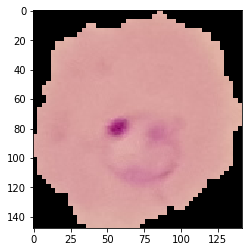

In [14]:
plt.imshow(para_cell)

In [15]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [16]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [18]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

2022-08-12 21:35:41.820414: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-08-12 21:35:41.822759: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2419200000 Hz
2022-08-12 21:35:41.822967: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55e7f6e34470 executing computations on platform Host. Devices:
2022-08-12 21:35:41.822977: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [21]:
batch_size = 16

In [22]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [23]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [24]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 336s 215ms/step - loss: 0.4111 - accuracy: 0.8190 - val_loss: 0.2178 - val_accuracy: 0.9265
Epoch 2/20
1560/1560 [==============================] - 371s 238ms/step - loss: 0.1856 - accuracy: 0.9427 - val_loss: 0.2040 - val_accuracy: 0.9385
Epoch 3/20
1560/1560 [==============================] - 334s 214ms/step - loss: 0.1731 - accuracy: 0.9473 - val_loss: 0.1725 - val_accuracy: 0.9438
Epoch 4/20
1560/1560 [==============================] - 325s 208ms/step - loss: 0.1666 - accuracy: 0.9478 - val_loss: 0.1803 - val_accuracy: 0.9408
Epoch 5/20
1560/1560 [==============================] - 365s 234ms/step - loss: 0.1579 - accuracy: 0.9496 - val_loss: 0.1512 - val_accuracy: 0.9504
Epoch 6/20
1560/1560 [==============================] - 325s 208ms/step - loss: 0.1572 - accuracy: 0.9502 - val_loss: 0.1545 - val_accuracy: 0.9512
Epoch 7/20
1560/1560 [==============================] - 325s 208ms/step - loss: 0.1573 - accuracy: 0.9496 - val_

In [27]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [31]:
metrics = pd.DataFrame(model.history.history)

In [32]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.411120,0.819016,0.217784,0.926538
1,0.185562,0.942664,0.203995,0.938462
2,0.173129,0.947311,0.172479,0.943846
3,0.166624,0.947792,0.180325,0.940769
4,0.157872,0.949555,0.151157,0.950385
5,0.157222,0.950236,0.154481,0.951154
6,0.157327,0.949635,0.157851,0.943462


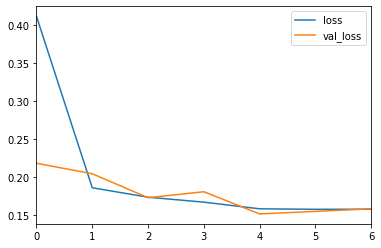

In [33]:
metrics[['loss', 'val_loss']].plot()

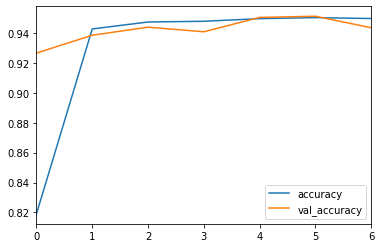

In [34]:
metrics[['accuracy', 'val_accuracy']].plot()

In [35]:
model.evaluate_generator(test_image_gen)

[0.16465445373355886, 0.94653845]

In [36]:
pred = model.predict_generator(test_image_gen)

In [39]:
predictions = pred > 0.5

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1300
           1       0.92      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [43]:
from tensorflow.keras.preprocessing import image

In [47]:
my_image = image.load_img(os.path.join(train_path, 'parasitized', 'C100P61ThinF_IMG_20150918_144104_cell_162.png'), target_size=image_shape)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [48]:
my_image_arr = image.img_to_array(my_image)

In [49]:
my_image_arr = my_image_arr.reshape((1, 130, 130, 3))

In [50]:
model.predict(my_image_arr)

array([[0.]], dtype=float32)